In [1]:
import h3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('dadosSP.csv',delimiter=';')
dfCoordenates=pd.read_csv('coordenadas.csv',delimiter=';')

In [3]:
df.head()

,Station,Date,Hour,NO,NO2
0,Cerqueira Cesar,01/01/2019,01:00:00,NaN,NaN
1,Cerqueira Cesar,01/01/2019,02:00:00,1.0,10.0
2,Cerqueira Cesar,01/01/2019,03:00:00,1.0,10.0
3,Cerqueira Cesar,01/01/2019,04:00:00,0.0,7.0
4,Cerqueira Cesar,01/01/2019,05:00:00,1.0,7.0


In [4]:
dfCoordenates['Station']=df.Station.unique()
dfCoordenates

,Station,Latitude,Longitude
0,Cerqueira Cesar,-23.553291,-46.673462
1,Congonhas,-23.616203,-46.662945
2,Ibirapuera,-23.587416,-46.657634
3,Interlagos,-23.680984,-46.675839
4,Itaim Paulista,-23.501934,-46.420393
5,Marginal Tiete – Ponte dos remedios,-23.518655,-46.741190
6,Parque dom pedro II,-23.544080,-46.627352
7,Pico Jaragua,-23.458247,-46.766860
8,Pinheiros,-23.561190,-46.701544


In [5]:
# join date and hour in dataframe df
df['Date']=pd.to_datetime(df.Date) + pd.to_timedelta(df.Hour)
df.drop(columns=['Hour'],inplace=True)
df.head()

,Station,Date,NO,NO2
0,Cerqueira Cesar,2019-01-01 01:00:00,NaN,NaN
1,Cerqueira Cesar,2019-01-01 02:00:00,1.0,10.0
2,Cerqueira Cesar,2019-01-01 03:00:00,1.0,10.0
3,Cerqueira Cesar,2019-01-01 04:00:00,0.0,7.0
4,Cerqueira Cesar,2019-01-01 05:00:00,1.0,7.0


In [6]:
# convert other columns to numeric
df[df.columns[2:]] = df[df.columns[2:]].apply(pd.to_numeric, errors='coerce', axis=1)

In [7]:
df.head()

,Station,Date,NO,NO2
0,Cerqueira Cesar,2019-01-01 01:00:00,NaN,NaN
1,Cerqueira Cesar,2019-01-01 02:00:00,1.0,10.0
2,Cerqueira Cesar,2019-01-01 03:00:00,1.0,10.0
3,Cerqueira Cesar,2019-01-01 04:00:00,0.0,7.0
4,Cerqueira Cesar,2019-01-01 05:00:00,1.0,7.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158328 entries, 0 to 158327
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Station  158328 non-null  object        
 1   Date     158328 non-null  datetime64[ns]
 2   NO       130546 non-null  float64       
 3   NO2      130546 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 4.8+ MB


### April 2019

In [9]:
# April 2019
i = pd.date_range('2019-04-01 00:00:00', periods=31, freq='24H')
dfTemp=df.loc[(df.Date >= i[0]) & (df.Date <= i[-1])]
# indexes for 2019-05-01
temp=dfTemp.loc[dfTemp['Date']==pd.date_range('2019-05-01 00:00:00', periods=1, freq='24H')[0]].index
# Remove 2019-05-01
dfTemp.drop(temp,inplace=True)
# Reset index
dfTemp.reset_index(inplace=True,drop=True)
dfTemp

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Station,Date,NO,NO2
0,Cerqueira Cesar,2019-04-01 01:00:00,NaN,NaN
1,Cerqueira Cesar,2019-04-01 02:00:00,6.0,25.0
2,Cerqueira Cesar,2019-04-01 03:00:00,4.0,7.0
3,Cerqueira Cesar,2019-04-01 04:00:00,12.0,15.0
4,Cerqueira Cesar,2019-04-01 05:00:00,7.0,16.0
...,...,...,...,...
6475,Pinheiros,2019-04-12 20:00:00,31.0,105.0
6476,Pinheiros,2019-04-12 21:00:00,67.0,106.0
6477,Pinheiros,2019-04-12 22:00:00,92.0,104.0
6478,Pinheiros,2019-04-12 23:00:00,92.0,88.0


### Analysis of NO mean and median

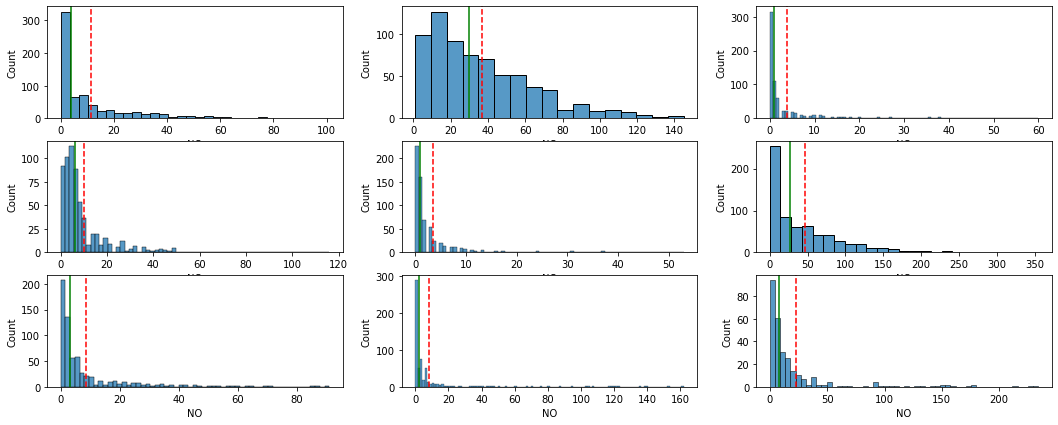

In [10]:
# Mean for each station
fig, ax = plt.subplots(3,3,figsize=(18,7))

col=dfTemp['Station'].unique()

for index,i in enumerate(col):

    temp=dfTemp[['Station','NO']].dropna()
    temp=temp.loc[temp['Station']==i]
    
    
   
    sns.histplot(data=temp, x='NO',ax=ax[index//3][index%3])
    mean=temp['NO'].mean()
    median=temp['NO'].median()
    ax[index//3][index%3].axvline(mean, color='r', linestyle='--')
    ax[index//3][index%3].axvline(median, color='g', linestyle='-')
    
 

###  Analysis of NO2 mean and median

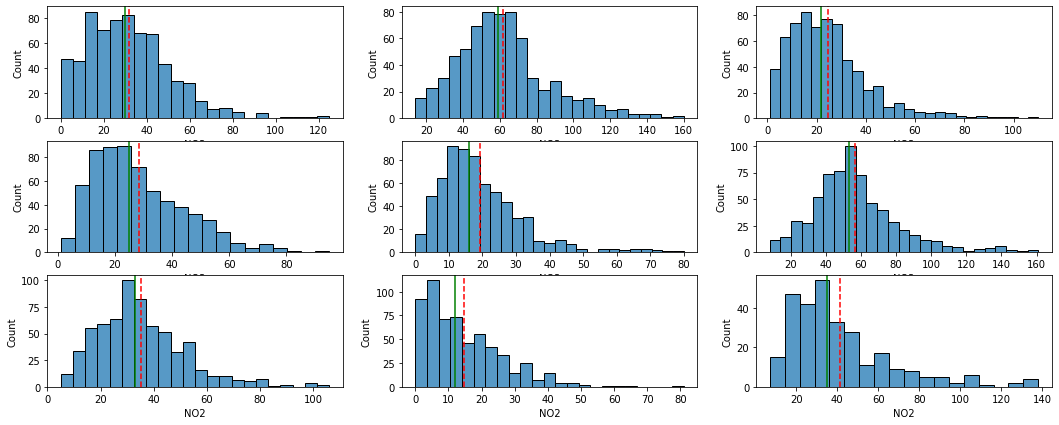

In [11]:
# Mean for each station
fig, ax = plt.subplots(3,3,figsize=(18,7))

col=dfTemp['Station'].unique()

for index,i in enumerate(col):

    temp=dfTemp[['Station','NO2']].dropna()
    temp=temp.loc[temp['Station']==i]
    
    
   
    sns.histplot(data=temp, x='NO2',ax=ax[index//3][index%3])
    mean=temp['NO2'].mean()
    median=temp['NO2'].median()
    ax[index//3][index%3].axvline(mean, color='r', linestyle='--')
    ax[index//3][index%3].axvline(median, color='g', linestyle='-')

In [12]:
# Dataset
# Mean
col=dfTemp['Station'].unique()
meanNO=[]
meanNO2=[]

for i in col:

    temp=dfTemp.loc[dfTemp['Station']==i]
    
    meanNO.append(temp['NO'].mean())
    meanNO2.append(temp['NO2'].mean())
        

In [13]:
# Create Data Frame
dfApril2019=pd.DataFrame({'Station':col,'NO':meanNO,'NO2':meanNO2})
dfApril2019

,Station,NO,NO2
0,Cerqueira Cesar,11.286754,31.784571
1,Congonhas,36.791066,61.951009
2,Ibirapuera,3.835596,24.767722
3,Interlagos,9.916535,28.223622
4,Itaim Paulista,3.486486,19.364865
5,Marginal Tiete – Ponte dos remedios,46.523308,56.807519
6,Parque dom pedro II,8.421779,35.207055
7,Pico Jaragua,8.570000,14.656667
8,Pinheiros,22.463668,41.370242


In [14]:
# Concatenate dfApril2019 and dfCoordenates
dfSP2019 = pd.concat([dfApril2019, dfCoordenates[['Latitude','Longitude']]], axis=1)
dfSP2019.drop(columns=['Station'],inplace=True)
dfSP2019

,NO,NO2,Latitude,Longitude
0,11.286754,31.784571,-23.553291,-46.673462
1,36.791066,61.951009,-23.616203,-46.662945
2,3.835596,24.767722,-23.587416,-46.657634
3,9.916535,28.223622,-23.680984,-46.675839
4,3.486486,19.364865,-23.501934,-46.420393
5,46.523308,56.807519,-23.518655,-46.741190
6,8.421779,35.207055,-23.544080,-46.627352
7,8.570000,14.656667,-23.458247,-46.766860
8,22.463668,41.370242,-23.561190,-46.701544


In [15]:
# convert ug/m3 to ppb
# The conversion assumes an ambient pressure of 1 atmosphere and a temperature of 25 degrees Celsius.
# https://www2.dmu.dk/atmosphericenvironment/expost/database/docs/ppm_conversion.pdf
dfSP2019['NO2']=dfSP2019['NO2']/1.88
dfSP2019['NO']=dfSP2019['NO']/1.25
dfSP2019

,NO,NO2,Latitude,Longitude
0,9.029403,16.906686,-23.553291,-46.673462
1,29.432853,32.952664,-23.616203,-46.662945
2,3.068477,13.174320,-23.587416,-46.657634
3,7.933228,15.012565,-23.680984,-46.675839
4,2.789189,10.300460,-23.501934,-46.420393
5,37.218647,30.216765,-23.518655,-46.741190
6,6.737423,18.727157,-23.544080,-46.627352
7,6.856000,7.796099,-23.458247,-46.766860
8,17.970934,22.005448,-23.561190,-46.701544


In [16]:
# get h3 index
hexagonTemp=[]
for i in range(dfSP2019.shape[0]):
    # define hexagon
    hexagonTemp.append(h3.geo_to_h3(dfSP2019.iloc[i]['Latitude'], dfSP2019.iloc[i]['Longitude'], 9))

In [17]:
# Set hexagon index as index in dataframe
dfSP2019['temp']=hexagonTemp
dfSP2019.set_index('temp',inplace=True)
dfSP2019.drop(columns=['Latitude', 'Longitude'],inplace=True)
dfSP2019.index.name = 'h3id'

In [18]:
dfSP2019

,NO,NO2
h3id,,
89a8100ea3bffff,9.029403,16.906686
89a8100e0b3ffff,29.432853,32.952664
89a8100e333ffff,3.068477,13.174320
89a81000c77ffff,7.933228,15.012565
89a81071433ffff,2.789189,10.300460
89a8103b033ffff,37.218647,30.216765
89a8100c38bffff,6.737423,18.727157
89a81038353ffff,6.856000,7.796099
89a8100e837ffff,17.970934,22.005448


In [19]:
### Save data in csv
series=dfSP2019.iloc[:,0]
dfSP2019.to_csv('saopaulo2019.csv')